In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [2]:
# Read csv
df = pd.read_csv('supermarket.csv', names=list(range(49)), header=None)

# All products in dataset
items = set()
for col in df:
    items.update(df[col].unique())

items.remove(np.nan)
items = set(x for x in items if 'department' not in x)
items

{'750ml red imp',
 '750ml red nz',
 '750ml white imp',
 '750ml white nz',
 'baby needs',
 'bake off products',
 'baking needs',
 'beef',
 'beverages hot',
 'biscuits',
 'bread and cake',
 'breakfast food',
 'brushware',
 'canned fish-meat',
 'canned fruit',
 'canned vegetables',
 'casks red wine',
 'casks white wine',
 'cheese',
 'chickens',
 'cigarette cartons',
 'cigs-tobacco pkts',
 'cleaners-polishers',
 'coffee',
 'cold-meats',
 'condiments',
 'confectionary',
 'cooking oils',
 'cough-cold-pain',
 'dairy foods',
 'deli gourmet',
 'delicatessen misc',
 'dental needs',
 'deod-disinfectant',
 'deodorants-soap',
 'dishcloths-scour',
 'dried vegetables',
 'electrical',
 'frozen foods',
 'fruit',
 'fruit drinks',
 'fuels-garden aids',
 'gourmet meat',
 'grocery misc',
 'haberdashery',
 'haircare',
 'health food other',
 'health&beauty misc',
 'high',
 'hogget',
 'imported cheese',
 'insecticides',
 'jams-spreads',
 'juice-sat-cord-ms',
 'kitchen',
 'lamb',
 'laundry needs',
 'lotions-cr

In [3]:
itemset = set(items)
encoded_vals = []

for index, row in df.iterrows():
    rowset = set(row) 
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)

ohe_df = pd.DataFrame(encoded_vals)
ohe_df

,lamb,deli gourmet,puddings-deserts,pet foods,dental needs,medicines,port and sherry,dairy foods,lotions-creams,cigarette cartons,...,wrapping,fruit,baking needs,mens toiletries,cheese,margarine,canned vegetables,vegetables,sauces-gravy-pkle,750ml white nz
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,1,0
2,1,0,1,0,0,0,0,1,0,0,...,1,1,1,0,0,0,0,1,1,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,1,1,1,1,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4622,0,0,1,0,0,0,0,1,0,0,...,0,1,1,0,1,1,1,1,1,0
4623,0,0,1,1,0,0,0,1,0,0,...,1,0,1,0,1,0,1,1,1,0
4624,0,0,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
4625,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,1,1,0,0,0,0


In [4]:
freq_items = apriori(ohe_df, min_support=0.25, use_colnames=True, verbose=1)
freq_items.sort_values(by='support', ascending=False, inplace=True)
freq_items.insert(loc=2, column='count', value=freq_items['support'] * len(ohe_df))
freq_items.loc[freq_items['itemsets'].str.len() > 3].round(2)

Processing 5 combinations | Sampling itemset size 5


,support,itemsets,count
235,0.28,"(fruit, milk-cream, bread and cake, vegetables)",1311.0
239,0.27,"(fruit, vegetables, bread and cake, baking needs)",1255.0
238,0.27,"(fruit, frozen foods, vegetables, bread and cake)",1242.0
237,0.26,"(fruit, biscuits, vegetables, bread and cake)",1216.0
236,0.25,"(baking needs, milk-cream, bread and cake, veg...",1169.0
234,0.25,"(fruit, milk-cream, bread and cake, baking needs)",1161.0


In [5]:
# More than 1800
products = freq_items[::]
products.loc[(freq_items['count'] > 1800) & (freq_items['itemsets'].str.len() == 1)].round(2)

,support,itemsets,count
19,0.72,(bread and cake),3330.0
22,0.64,(fruit),2962.0
27,0.64,(vegetables),2961.0
6,0.64,(low),2948.0
13,0.64,(milk-cream),2939.0
23,0.60,(baking needs),2795.0
16,0.59,(frozen foods),2717.0
15,0.56,(biscuits),2605.0
14,0.53,(juice-sat-cord-ms),2463.0
18,0.50,(party snack foods),2330.0


In [6]:
# Additional block for single product histogram
single_products = freq_items.loc[freq_items['itemsets'].str.len() == 1]
single_products

,support,itemsets,count
19,0.719689,(bread and cake),3330.0
22,0.640156,(fruit),2962.0
27,0.639939,(vegetables),2961.0
6,0.637130,(low),2948.0
13,0.635185,(milk-cream),2939.0
23,0.604063,(baking needs),2795.0
16,0.587206,(frozen foods),2717.0
15,0.563000,(biscuits),2605.0
14,0.532310,(juice-sat-cord-ms),2463.0
18,0.503566,(party snack foods),2330.0


<ipython-input-7-107e9d41dafc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_products.sort_values(by='count', ascending=True, inplace=True)


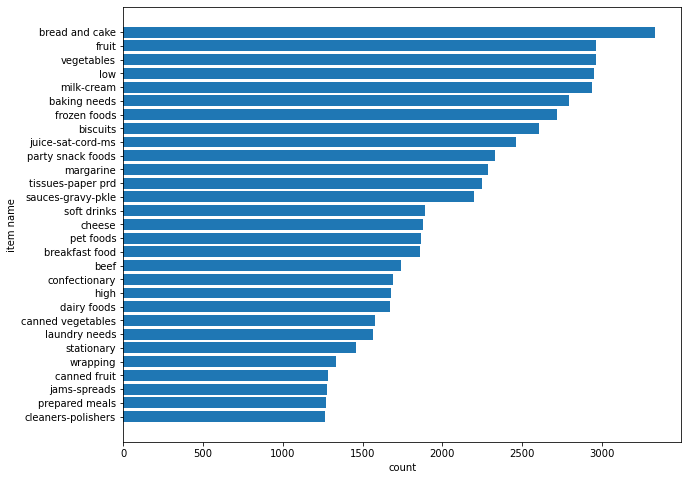

In [7]:
single_products.sort_values(by='count', ascending=True, inplace=True)

plt.figure(figsize=(10, 8))
plt.ylabel('item name')
plt.xlabel('count')
plt.barh([''.join(x) for x in single_products['itemsets'].to_numpy()], width=[ x for x in single_products['count']], height=0.8) 
plt.show()

# Nizej widaz, ze bread and cake sa najczeszcziej kupowane, natomiast deaners-polishers najrzadczej

In [8]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.79)
rules.round(2)

# Z ponizszej tablicy wynika, ze na przyklad milk-cream oraz bread and cake sa niezalezne kupowane, 
# ale jest wielke prawdopodobienstwo, ze mozna ich bedzie zobaczyc w jednym zakupie

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(milk-cream),(bread and cake),0.64,0.72,0.51,0.80,1.10,0.05,1.37
1,(biscuits),(bread and cake),0.56,0.72,0.45,0.80,1.11,0.04,1.40
2,(margarine),(bread and cake),0.49,0.72,0.40,0.80,1.11,0.04,1.40
3,"(fruit, vegetables)",(bread and cake),0.48,0.72,0.39,0.81,1.13,0.04,1.49
4,(tissues-paper prd),(bread and cake),0.49,0.72,0.38,0.79,1.10,0.03,1.34
...,...,...,...,...,...,...,...,...,...
64,"(biscuits, tissues-paper prd)",(bread and cake),0.31,0.72,0.26,0.83,1.16,0.04,1.67
65,"(fruit, sauces-gravy-pkle)",(vegetables),0.32,0.64,0.26,0.80,1.24,0.05,1.77
66,"(party snack foods, juice-sat-cord-ms)",(bread and cake),0.32,0.72,0.26,0.80,1.11,0.02,1.38
67,"(vegetables, milk-cream, baking needs)",(bread and cake),0.30,0.72,0.25,0.84,1.17,0.04,1.75


In [13]:
pd.set_option('display.max_rows', None)

# Show only with 'high'
freq_items_min = apriori(ohe_df, min_support=0.15, use_colnames=True, verbose=1)
rules_min = association_rules(freq_items_min, metric="confidence", min_threshold=0.5)
rules_min = rules_min[rules_min["consequents"].apply(lambda x: "high" in x)]
rules_min.round(2)

Processing 1092 combinations | Sampling itemset size 6


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,(pet foods),(high),0.40,0.36,0.21,0.51,1.41,0.06,1.31
79,(laundry needs),(high),0.34,0.36,0.18,0.54,1.48,0.06,1.37
150,(breakfast food),(high),0.40,0.36,0.20,0.50,1.38,0.06,1.28
178,(tissues-paper prd),(high),0.49,0.36,0.25,0.51,1.42,0.07,1.31
312,(wrapping),(high),0.29,0.36,0.16,0.55,1.53,0.06,1.43
316,(cheese),(high),0.41,0.36,0.21,0.51,1.39,0.06,1.29
318,(canned vegetables),(high),0.34,0.36,0.18,0.52,1.44,0.05,1.33
321,(sauces-gravy-pkle),(high),0.48,0.36,0.24,0.51,1.41,0.07,1.30
410,"(tissues-paper prd, pet foods)",(high),0.24,0.36,0.15,0.63,1.75,0.07,1.74
440,"(milk-cream, pet foods)",(high),0.28,0.36,0.16,0.57,1.57,0.06,1.48
